In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [2]:
ds = fetch_openml("mnist_784")

In [3]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(ds.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
ds.data.shape

(70000, 784)

In [11]:
np.set_printoptions(linewidth=160)
ds.data.iloc[60].values.reshape(28,28).astype('int')

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  53,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84,  21,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  71, 235, 213,   5,   0,   0,   0,   0,   0,   0,  88, 248

In [12]:
ds.target[60]

'4'

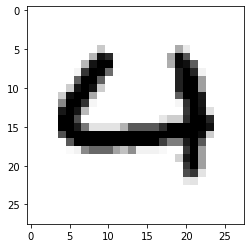

In [15]:
plt.imshow( ds.data.iloc[60].values.reshape(28,28).astype('int') , cmap="gray_r" )

In [16]:
X_train, X_test, y_train, y_test = train_test_split( ds.data, ds.target, test_size=.2, random_state=0 )

In [17]:
X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [18]:
%%time
model = KNeighborsClassifier(7)
model.fit(X_train, y_train)

CPU times: user 149 ms, sys: 904 µs, total: 150 ms
Wall time: 156 ms


In [19]:
y_pred = model.predict(X_test)

In [20]:
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2,3,4,5,6,7,8,9
0,1377,0,2,0,0,2,6,0,0,0
1,0,1577,2,0,0,0,0,1,0,0
2,11,14,1382,5,3,0,2,18,7,1
3,1,4,13,1376,1,13,0,8,14,5
4,2,7,0,0,1305,0,2,4,0,30
5,4,4,2,11,1,1185,15,2,1,6
6,6,2,2,0,5,8,1363,0,1,0
7,1,19,6,0,2,0,0,1414,1,15
8,1,21,2,17,5,20,4,3,1277,18
9,2,0,1,14,10,2,1,13,4,1314


In [21]:
model.score(X_test, y_test)

0.9692857142857143

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)

0.9692857142857143

In [26]:
model.predict( ds.data.iloc[55].values.reshape(1,-1) )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['8'], dtype=object)

In [27]:
model.predict_proba( ds.data.iloc[55].values.reshape(1,-1) )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])